In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
%matplotlib inline 

In [105]:
df = pd.read_excel("etf_data_final.xlsx")

In [106]:
df.head()

,Unnamed: 0,index,date,SPY_p,IWM_p,EEM_p,TLT_p,LQD_p,TIP_p,IYR_p,...,FXE120_y,SPY250_y,IWM250_y,EEM250_y,TLT250_y,LQD250_y,TIP250_y,IYR250_y,GLD250_y,FXE250_y
0,0,250,2011-12-29,107.496193,66.057526,31.844088,98.016830,85.749313,102.159256,42.352482,...,0,1,0,0,1,1,1,1,1,0
1,1,251,2011-12-30,106.967743,65.701195,31.869280,98.333130,86.112694,102.124252,42.144760,...,0,1,0,0,1,1,1,1,1,0
2,2,252,2012-01-03,108.672401,66.788040,32.843678,96.857132,86.044540,102.089241,42.404408,...,0,1,0,0,1,1,1,1,1,0
3,3,253,2012-01-04,108.842880,66.422791,32.658875,95.705551,86.112694,102.185547,41.929615,...,0,1,0,0,1,1,1,1,1,0
4,4,254,2012-01-05,109.132668,66.796974,32.516071,95.535225,85.741760,102.378059,42.233788,...,0,1,0,0,1,1,1,1,1,0


In [107]:
df.drop(['Unnamed: 0','index','date','month','week'], axis = 1, inplace=True)

In [108]:
df.columns

Index(['SPY_p', 'IWM_p', 'EEM_p', 'TLT_p', 'LQD_p', 'TIP_p', 'IYR_p', 'GLD_p',
       'FXE_p', 'SPY_v',
       ...
       'FXE120_y', 'SPY250_y', 'IWM250_y', 'EEM250_y', 'TLT250_y', 'LQD250_y',
       'TIP250_y', 'IYR250_y', 'GLD250_y', 'FXE250_y'],
      dtype='object', length=287)

In [109]:
p_v_col = ['SPY_p', 'IWM_p', 'EEM_p', 'TLT_p', 
           'LQD_p', 'TIP_p', 'IYR_p', 'GLD_p',
           'FXE_p', 'SPY_v','IWM_v', 'EEM_v',
           'TLT_v', 'LQD_v', 'TIP_v', 'IYR_v',
           'GLD_v', 'FXE_v']

In [110]:
df.drop(p_v_col, axis = 1, inplace=True)

In [111]:
df_col = ['SPY', 'IWM', 'EEM', 'TLT', 'LQD', 'TIP', 'IYR',
       'GLD', 'FXE']

dummy = ['month_1', 
         'month_2', 
         'month_3', 
         'month_4', 
         'month_5', 
         'month_6', 
         'month_7', 
         'month_8', 
         'month_9',
         'month_10',
         'month_11',
         'month_12',
         'MON', 'TUE','WED', 'THU', 'FRI']

td = [1, 3, 5, 10, 20, 40, 60, 120, 250]

In [112]:
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
lw=2

In [120]:
df

,SPY_p_1,SPY_p_3,SPY_p_5,SPY_p_10,SPY_p_20,SPY_p_40,SPY_p_60,SPY_p_120,SPY_p_250,IWM_p_1,...,FXE120_y,SPY250_y,IWM250_y,EEM250_y,TLT250_y,LQD250_y,TIP250_y,IYR250_y,GLD250_y,FXE250_y
0,0.010334,-0.002136,0.015704,0.042549,0.015440,0.040327,0.129784,-0.033292,0.013506,0.010080,...,0,1,0,0,1,1,1,1,1,0
1,-0.004916,-0.007827,0.001836,0.033687,0.010610,0.018598,0.103792,-0.033871,0.009080,-0.005394,...,0,1,0,0,1,1,1,1,1,0
2,0.015936,0.021389,0.008782,0.048606,0.027620,0.016306,0.101456,-0.021750,0.019859,0.016542,...,0,1,0,0,1,1,1,1,1,0
3,0.001569,0.012528,0.009566,0.061601,0.018142,0.024146,0.110620,-0.013406,0.023464,-0.005469,...,0,1,0,0,1,1,1,1,1,0
4,0.002662,0.020239,0.025715,0.033164,0.020529,0.020529,0.077538,-0.016488,0.028207,0.005633,...,0,1,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,-0.015117,0.010719,-0.000905,-0.022301,-0.089215,-0.098368,-0.086366,-0.095581,-0.055381,-0.022196,...,0,0,0,0,0,0,0,0,0,0
1023,0.013643,0.018801,0.011379,-0.009942,-0.075263,-0.085936,-0.084317,-0.081447,-0.030055,0.019976,...,0,0,0,0,0,0,0,0,0,0
1024,-0.010883,-0.012545,0.013359,-0.028555,-0.083232,-0.096919,-0.093762,-0.094428,-0.049398,-0.013749,...,0,0,0,0,0,0,0,0,0,0
1025,0.005209,0.007834,0.012963,0.001483,-0.088187,-0.088430,-0.085098,-0.082196,-0.032277,-0.000201,...,0,0,0,0,0,0,0,0,0,0


SPY
Processing for horizon =  1
AUC good =  0.9885925036452525
accuracy :  0.9223300970873787


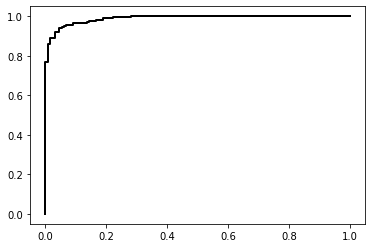

Processing for horizon =  3
AUC good =  0.9375277309432959
accuracy :  0.8446601941747572


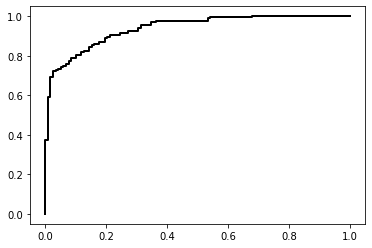

Processing for horizon =  5
AUC good =  0.9348207241167704
accuracy :  0.8284789644012945


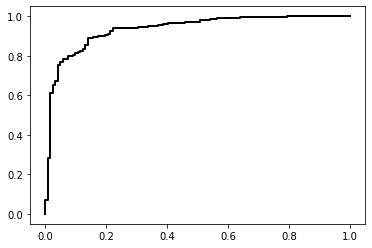

Processing for horizon =  10
AUC good =  0.9371827411167514
accuracy :  0.8317152103559871


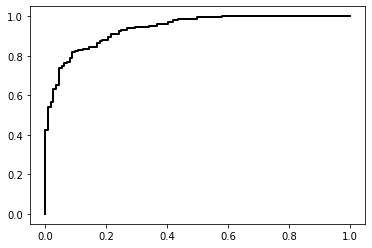

Processing for horizon =  20
AUC good =  0.9675673174794115
accuracy :  0.7799352750809061


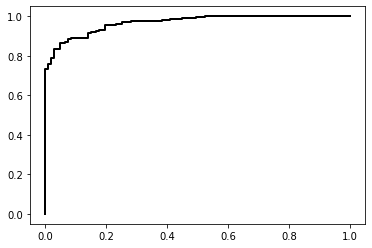

Processing for horizon =  40
AUC good =  0.9614130434782608
accuracy :  0.8576051779935275


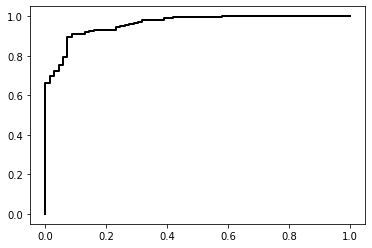

Processing for horizon =  60
AUC good =  0.9811787333424923
accuracy :  0.889967637540453


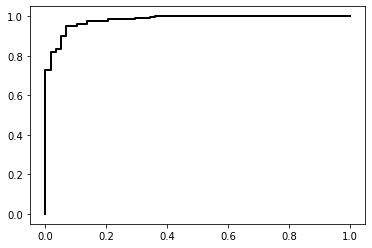

Processing for horizon =  120
AUC good =  0.9945848375451264
accuracy :  0.948220064724919


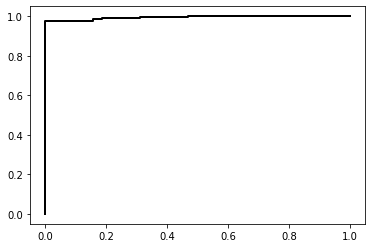

Processing for horizon =  250
AUC good =  0.992983367983368
accuracy :  0.9838187702265372


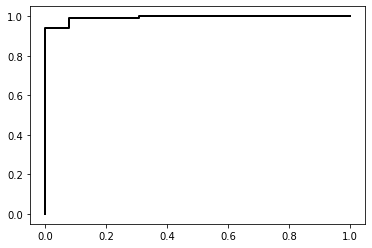

IWM
Processing for horizon =  1
AUC good =  0.9764087468460891
accuracy :  0.889967637540453


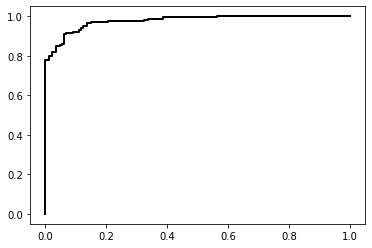

Processing for horizon =  3
AUC good =  0.927717019822283
accuracy :  0.8414239482200647


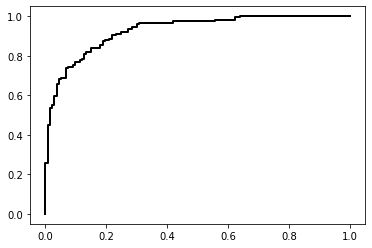

Processing for horizon =  5
AUC good =  0.9278984892208453
accuracy :  0.8446601941747572


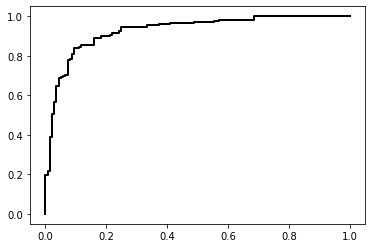

Processing for horizon =  10
AUC good =  0.9185357596275922
accuracy :  0.8220064724919094


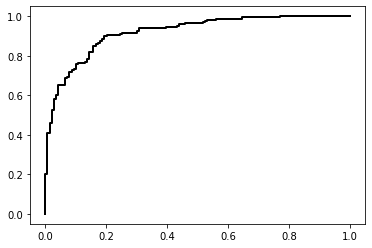

Processing for horizon =  20
AUC good =  0.9409764603312991
accuracy :  0.8252427184466019


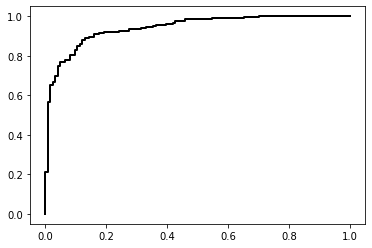

Processing for horizon =  40
AUC good =  0.9317502986857825
accuracy :  0.8025889967637541


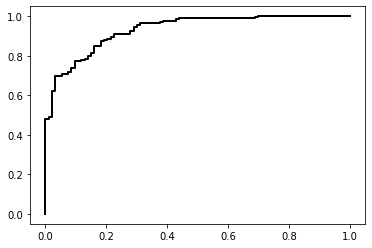

Processing for horizon =  60
AUC good =  0.9514873653907665
accuracy :  0.8381877022653722


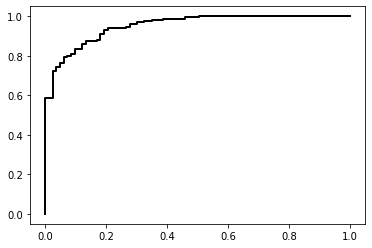

Processing for horizon =  120
AUC good =  0.966229952563813
accuracy :  0.8576051779935275


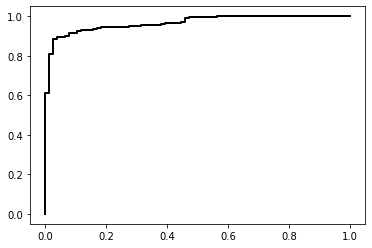

Processing for horizon =  250
AUC good =  0.960303893637227
accuracy :  0.9158576051779935


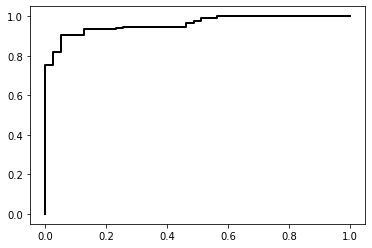

EEM
Processing for horizon =  1
AUC good =  0.9416126042632067
accuracy :  0.8284789644012945


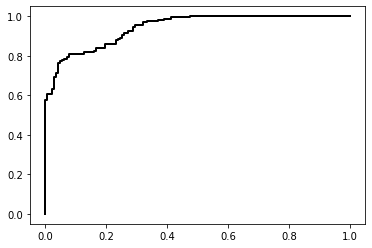

Processing for horizon =  3
AUC good =  0.8417726851461791
accuracy :  0.7411003236245954


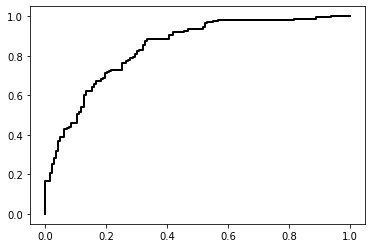

Processing for horizon =  5
AUC good =  0.8929080392321235
accuracy :  0.7928802588996764


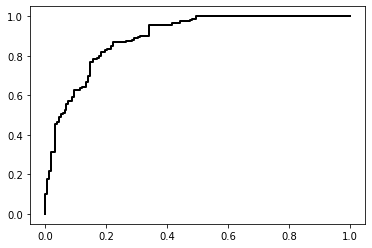

Processing for horizon =  10
AUC good =  0.8998658730824042
accuracy :  0.8025889967637541


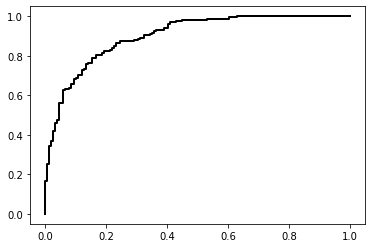

Processing for horizon =  20
AUC good =  0.9316990701606086
accuracy :  0.8478964401294499


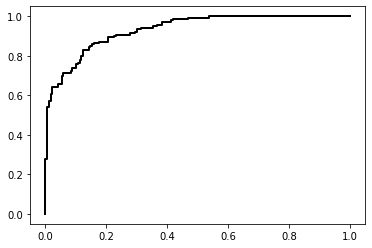

Processing for horizon =  40
AUC good =  0.963633316574493
accuracy :  0.889967637540453


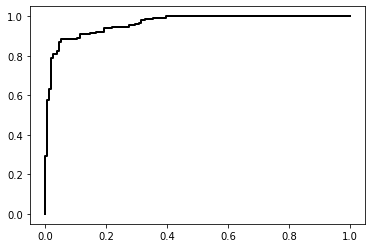

Processing for horizon =  60
AUC good =  0.9769108280254777
accuracy :  0.9158576051779935


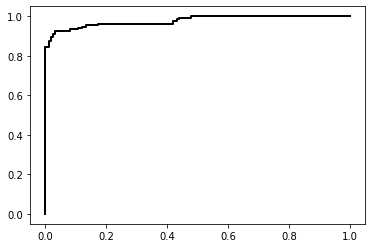

Processing for horizon =  120
AUC good =  0.957977207977208
accuracy :  0.883495145631068


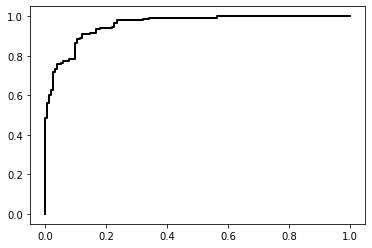

Processing for horizon =  250
AUC good =  0.9681109621186725
accuracy :  0.8705501618122977


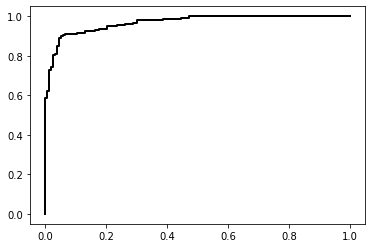

TLT
Processing for horizon =  1
AUC good =  0.9537751677852351
accuracy :  0.8478964401294499


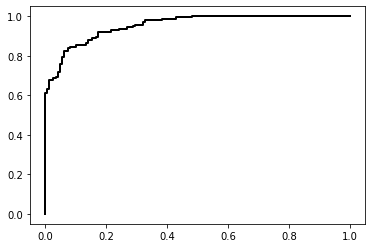

Processing for horizon =  3
AUC good =  0.9295591686221923
accuracy :  0.8090614886731392


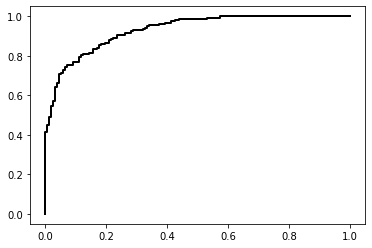

Processing for horizon =  5
AUC good =  0.9291938997821351
accuracy :  0.7864077669902912


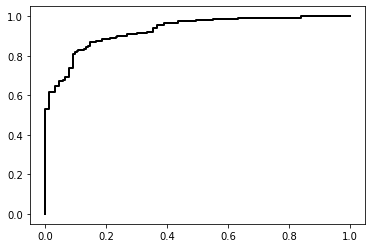

Processing for horizon =  10
AUC good =  0.8829697986577181
accuracy :  0.7669902912621359


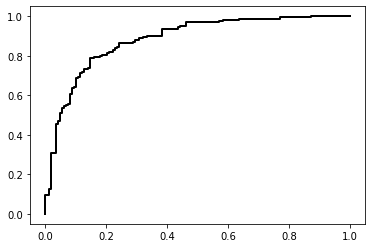

Processing for horizon =  20
AUC good =  0.9634687892752409
accuracy :  0.8478964401294499


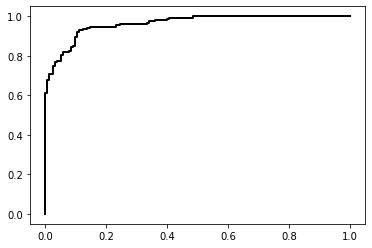

Processing for horizon =  40
AUC good =  0.926756163458291
accuracy :  0.8058252427184466


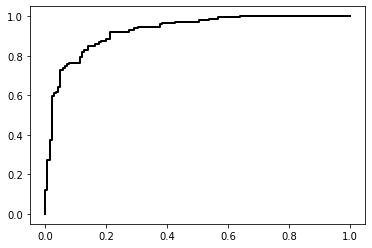

Processing for horizon =  60
AUC good =  0.9791987673343605
accuracy :  0.8640776699029126


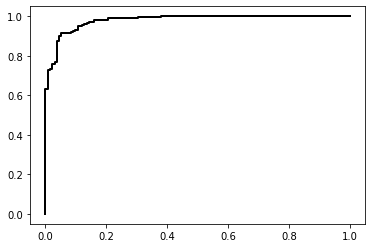

Processing for horizon =  120
AUC good =  0.9699215344376634
accuracy :  0.9029126213592233


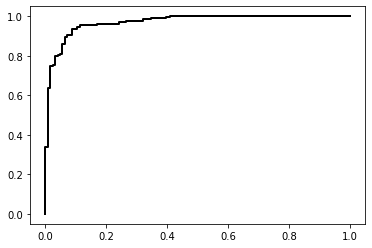

Processing for horizon =  250
AUC good =  0.9965277777777778
accuracy :  0.9288025889967637


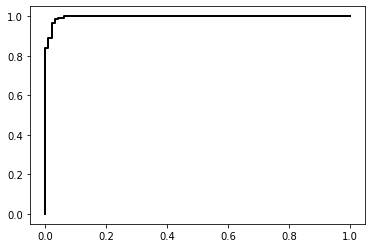

LQD
Processing for horizon =  1
AUC good =  0.9800252312867956
accuracy :  0.9061488673139159


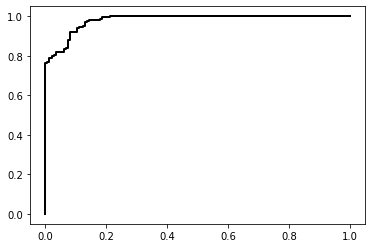

Processing for horizon =  3
AUC good =  0.908856805133401
accuracy :  0.7993527508090615


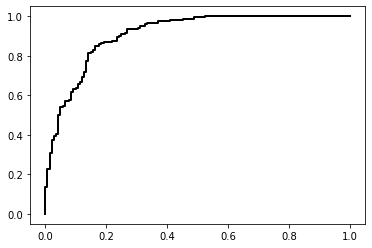

Processing for horizon =  5
AUC good =  0.9274179767600821
accuracy :  0.7928802588996764


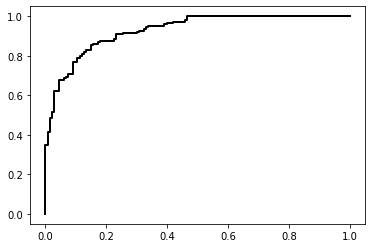

Processing for horizon =  10
AUC good =  0.8950676982591876
accuracy :  0.8058252427184466


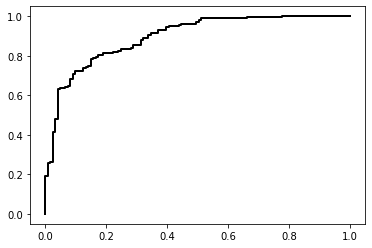

Processing for horizon =  20
AUC good =  0.940194292653309
accuracy :  0.7572815533980582


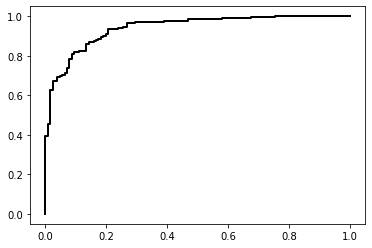

Processing for horizon =  40
AUC good =  0.9483574483574484
accuracy :  0.8025889967637541


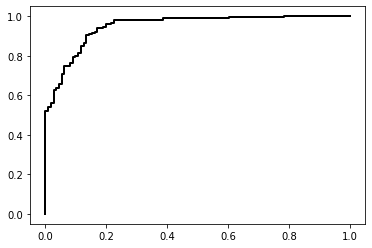

Processing for horizon =  60
AUC good =  0.9713723561239548
accuracy :  0.8737864077669902


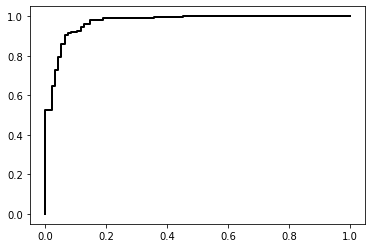

Processing for horizon =  120
AUC good =  0.9766609537251739
accuracy :  0.8964401294498382


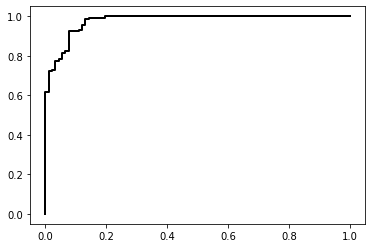

Processing for horizon =  250
AUC good =  0.9904974489795919
accuracy :  0.9223300970873787


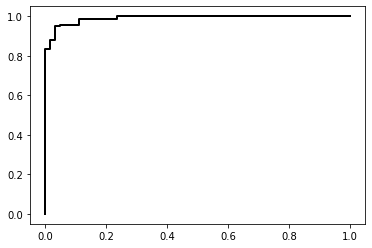

TIP
Processing for horizon =  1
AUC good =  0.9674040556393498
accuracy :  0.912621359223301


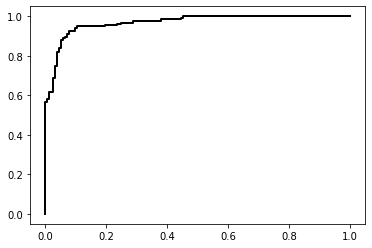

Processing for horizon =  3
AUC good =  0.8878508588186007
accuracy :  0.8090614886731392


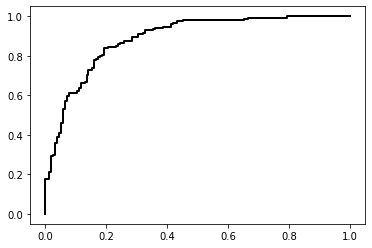

Processing for horizon =  5
AUC good =  0.9195859872611465
accuracy :  0.8381877022653722


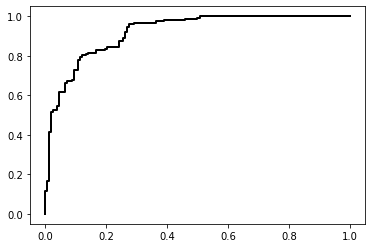

Processing for horizon =  10
AUC good =  0.9275180157533098
accuracy :  0.8349514563106796


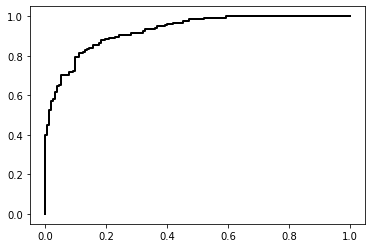

Processing for horizon =  20
AUC good =  0.9292433022591753
accuracy :  0.8381877022653722


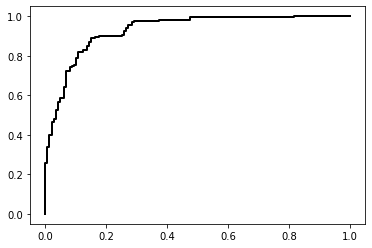

Processing for horizon =  40
AUC good =  0.8937762825904122
accuracy :  0.8025889967637541


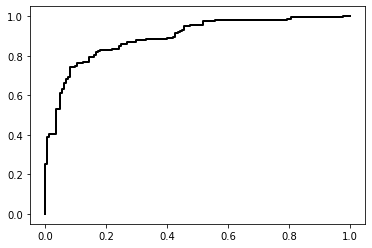

Processing for horizon =  60
AUC good =  0.9551303616484441
accuracy :  0.8705501618122977


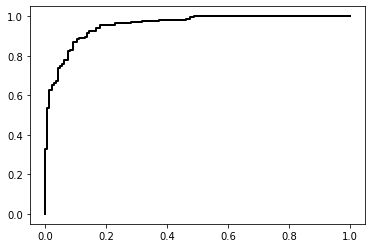

Processing for horizon =  120
AUC good =  0.9771885521885522
accuracy :  0.8576051779935275


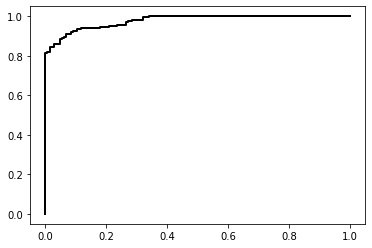

Processing for horizon =  250
AUC good =  0.9995317156236697
accuracy :  0.9773462783171522


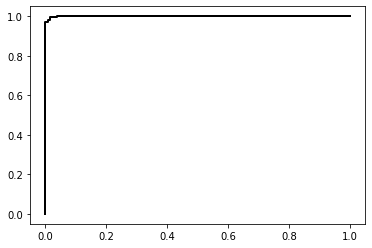

IYR
Processing for horizon =  1
AUC good =  0.9602881893815935
accuracy :  0.8737864077669902


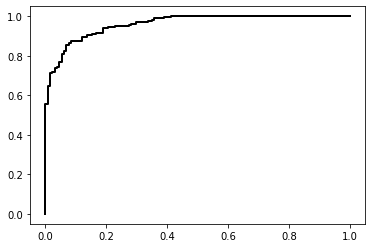

Processing for horizon =  3
AUC good =  0.8635459029159817
accuracy :  0.7572815533980582


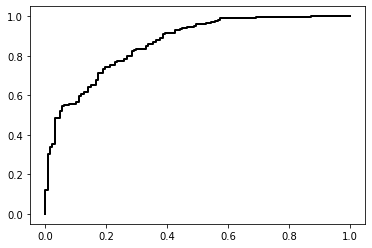

Processing for horizon =  5
AUC good =  0.8961314944921502
accuracy :  0.7864077669902912


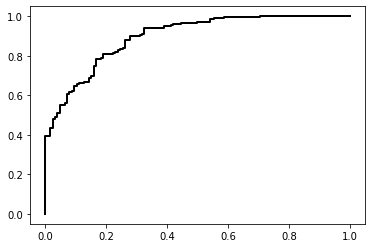

Processing for horizon =  10
AUC good =  0.9185342216838279
accuracy :  0.7540453074433657


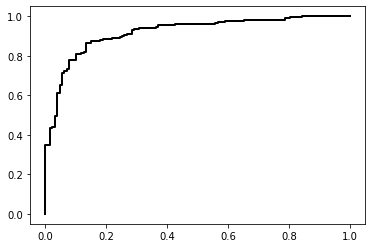

Processing for horizon =  20
AUC good =  0.9428271702071859
accuracy :  0.7443365695792881


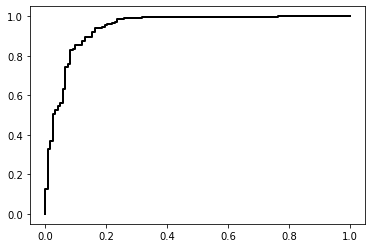

Processing for horizon =  40
AUC good =  0.9621185701830864
accuracy :  0.7928802588996764


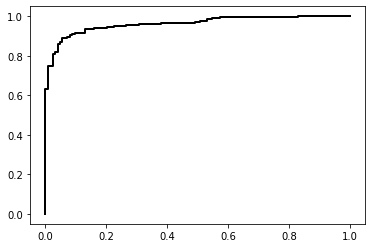

Processing for horizon =  60
AUC good =  0.9608636977058029
accuracy :  0.8058252427184466


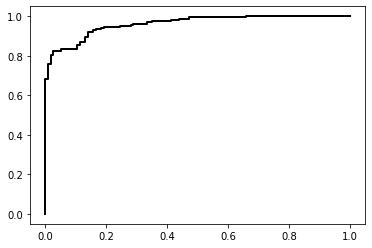

Processing for horizon =  120
AUC good =  0.9858718487394957
accuracy :  0.9093851132686084


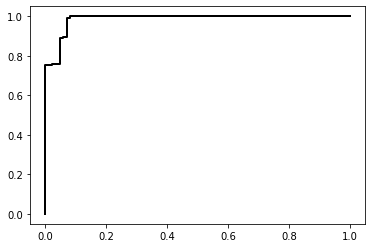

Processing for horizon =  250
AUC good =  0.975391032325339
accuracy :  0.8867313915857605


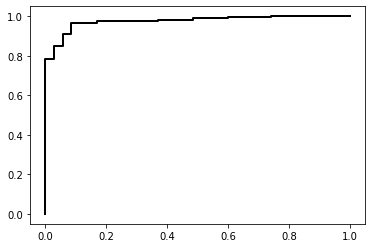

GLD
Processing for horizon =  1
AUC good =  0.9830607966457022
accuracy :  0.86084142394822


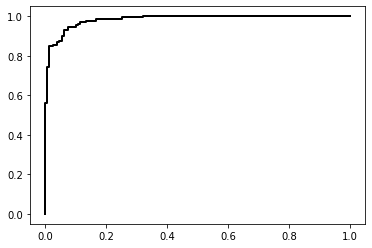

Processing for horizon =  3
AUC good =  0.7984323916505993
accuracy :  0.6796116504854369


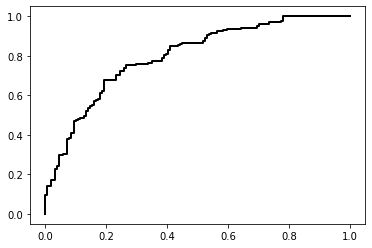

Processing for horizon =  5
AUC good =  0.8894988266845457
accuracy :  0.7896440129449838


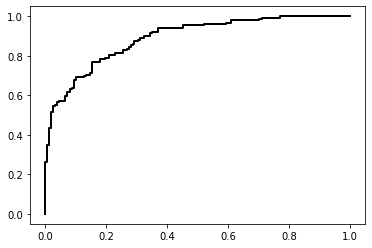

Processing for horizon =  10
AUC good =  0.8954533994453315
accuracy :  0.7928802588996764


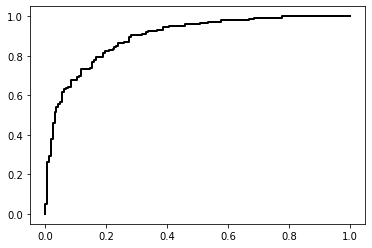

Processing for horizon =  20
AUC good =  0.8899020601148261
accuracy :  0.656957928802589


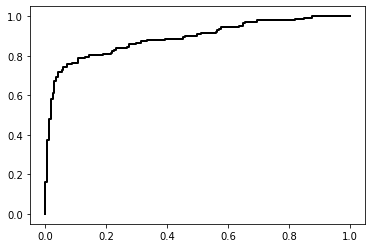

Processing for horizon =  40
AUC good =  0.9565456303850888
accuracy :  0.6472491909385113


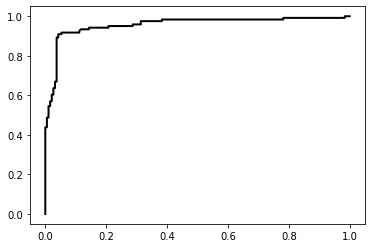

Processing for horizon =  60
AUC good =  0.9502127865364155
accuracy :  0.7734627831715211


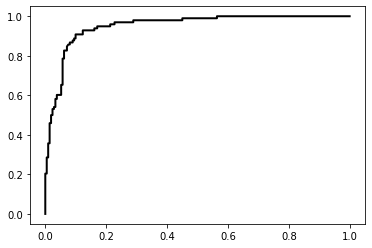

Processing for horizon =  120
AUC good =  0.909965034965035
accuracy :  0.7799352750809061


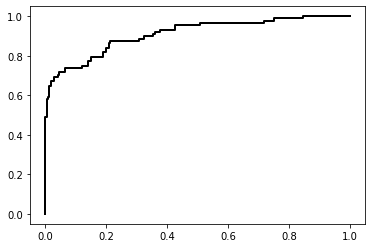

Processing for horizon =  250
AUC good =  0.9630566177377574
accuracy :  0.883495145631068


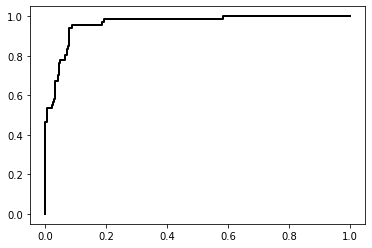

FXE
Processing for horizon =  1
AUC good =  0.9522727272727273
accuracy :  0.7734627831715211


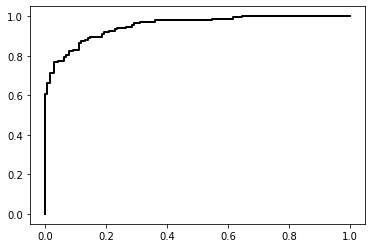

Processing for horizon =  3
AUC good =  0.8633808724832215
accuracy :  0.7313915857605178


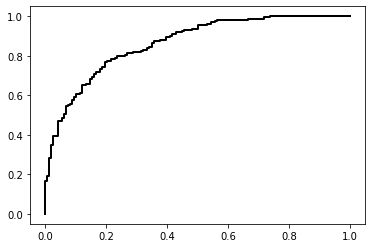

Processing for horizon =  5
AUC good =  0.8978187919463088
accuracy :  0.7152103559870551


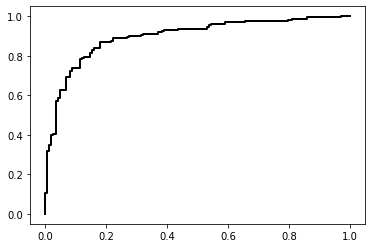

Processing for horizon =  10
AUC good =  0.9236477987421383
accuracy :  0.8252427184466019


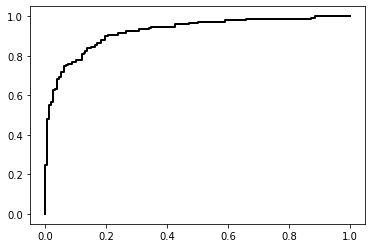

Processing for horizon =  20
AUC good =  0.9081391421816953
accuracy :  0.8155339805825242


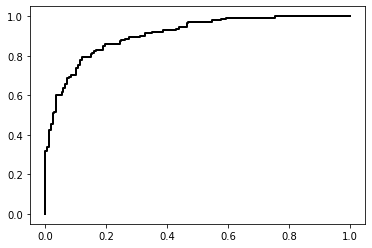

Processing for horizon =  40
AUC good =  0.9283976510067115
accuracy :  0.8090614886731392


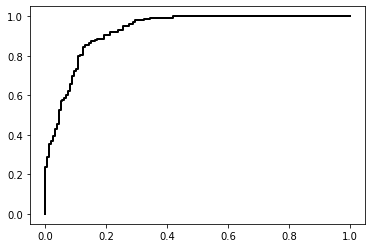

Processing for horizon =  60
AUC good =  0.9387031408308004
accuracy :  0.8478964401294499


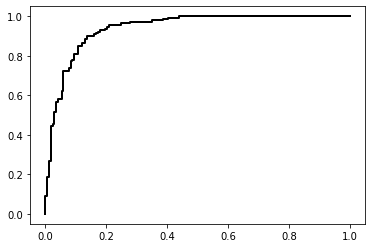

Processing for horizon =  120
AUC good =  0.9677684520204205
accuracy :  0.8511326860841424


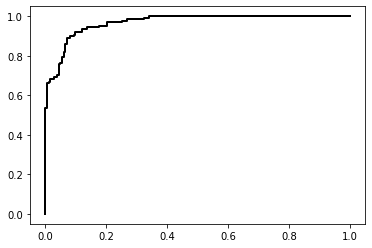

Processing for horizon =  250
AUC good =  0.9946808510638299
accuracy :  0.8640776699029126


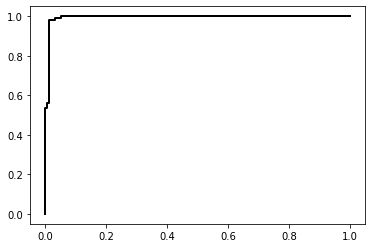

Wall time: 2min 35s


In [136]:
%%time
#df_data = pd.DataFrame
#df_data = df[dummy]

for i in df_col:
    
    print(i)
    
    for j in td:
                
        y_col = str(i)+str(j)+"_y"
                
        y_columns = df.columns[188:]
        
        #df_data[[r_col, v_col, y_col]] = df[[r_col, v_col, y_col]]
        
        X = df.drop(y_columns, axis = 1)
        X = df.drop([y_col], axis = 1)
        y = df[y_col]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=0.3,
                                                            random_state=0)
        
        
        print("Processing for horizon = ",j)
        
        for numtrees in {100,200,300}:
            lw=2
            clf = RandomForestClassifier(n_estimators=numtrees, 
                                         criterion='gini',
                                        max_depth = 1)
            clf.fit(X_train,y_train)

            predictions = clf.predict(X_test)
            probs = clf.predict_proba(X_test)
            
            #print("numtree : ",numtrees)
            #print(predictions)
            #print(probs)
        
        fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
        #fpr, tpr, thresholds = roc_curve(y_test, predictions)
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        print ("AUC good = ",roc_auc)
        print("accuracy : ", metrics.accuracy_score(y_test, predictions))
        plt.plot(fpr, tpr, lw=lw, color='black')
        #plt.title("Horizon = "+str(filename))
        plt.show()